In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 


df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

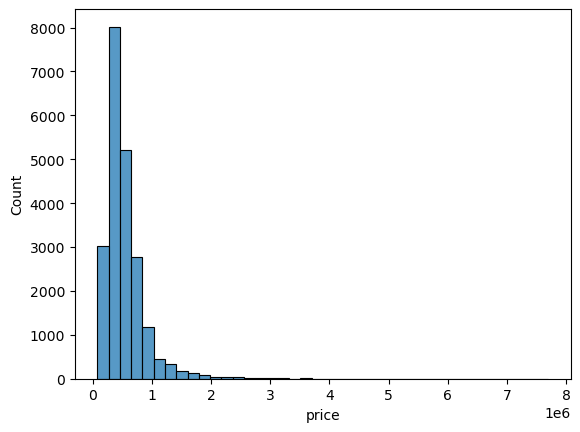

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)
df['day'] = df['date'].apply(lambda date: date.day)
df.drop('date',inplace=True,axis=1)
sns.histplot(data = df,x = 'price',bins=40)
plt.show()

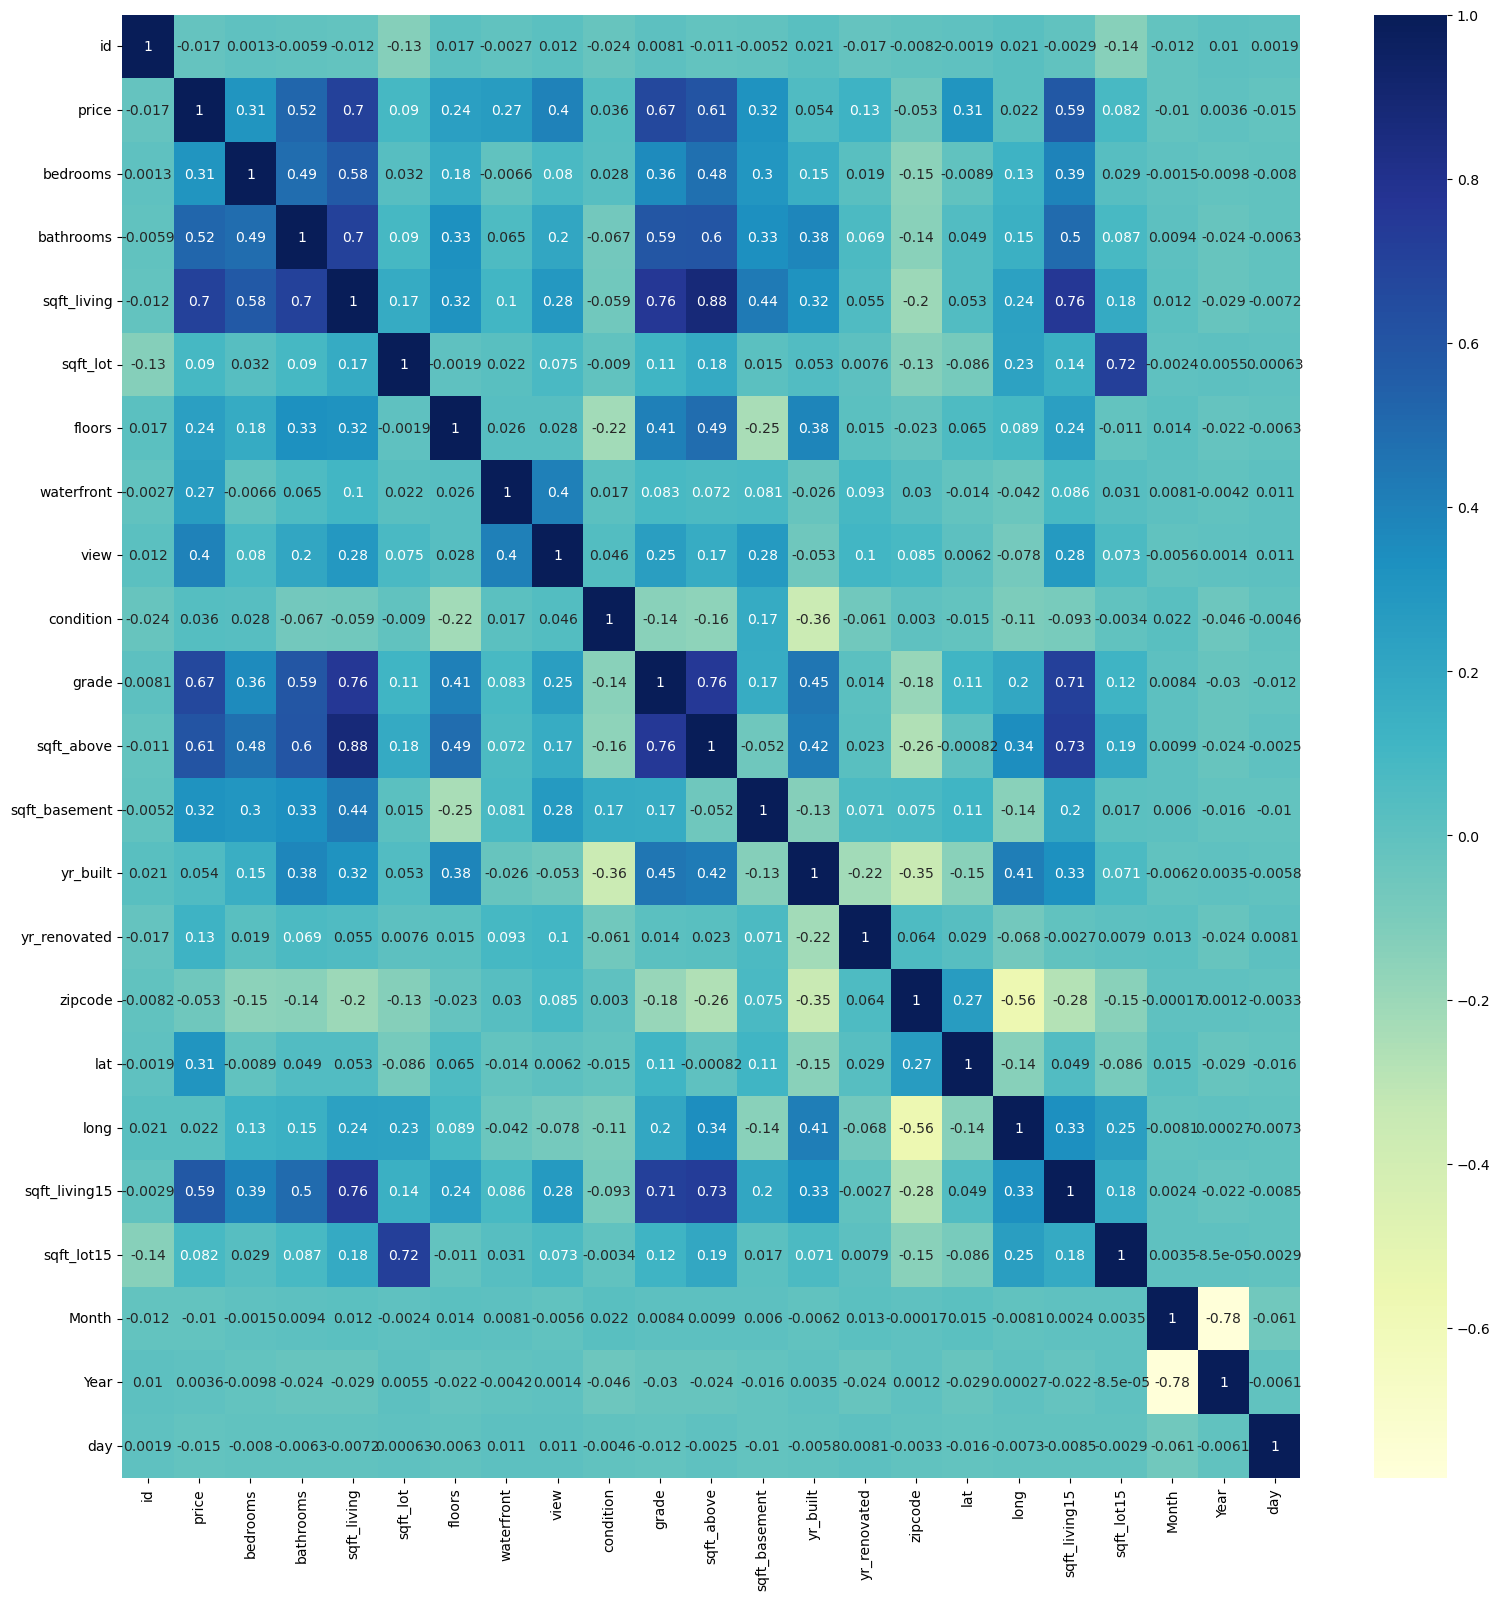

In [4]:
plt.figure(figsize=(19,19))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [5]:
df.drop('id',inplace=True,axis=1)

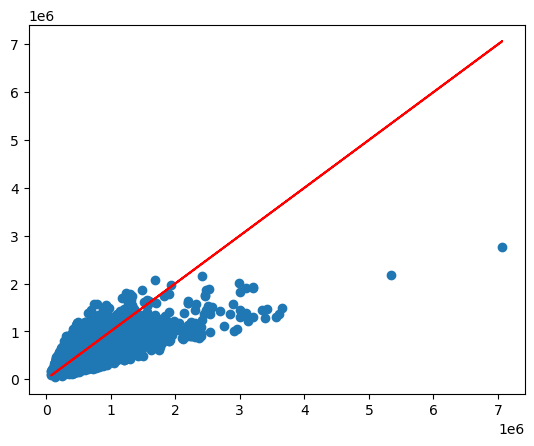

In [6]:
x = df['sqft_living'].values
y = df['price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')
plt.show()

In [7]:
print("MSE", mean_squared_error(y_test,pred_lr))
print("R squared", metrics.r2_score(y_test,pred_lr))

MSE 69707691009.3262
R squared 0.49343206701149156


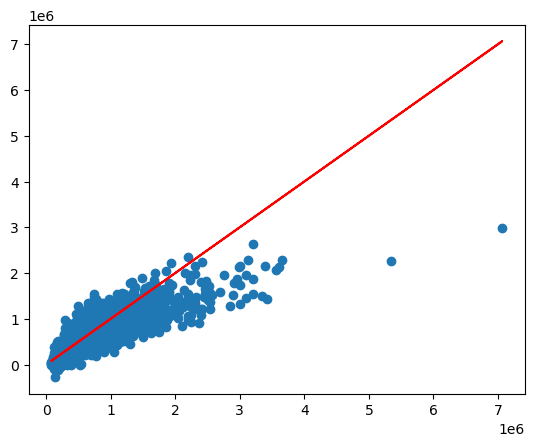

In [8]:
x = df[['bedrooms','bathrooms','sqft_living','floors','waterfront','view',
        'grade','sqft_above','sqft_basement','sqft_living15','lat',]].values
y = df['price'].values
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=50)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')
plt.show()

In [9]:
print("MSE", mean_squared_error(y_test,pred_lr))
print("R squared", metrics.r2_score(y_test,pred_lr))

MSE 46212796965.97592
R squared 0.6641701841258805


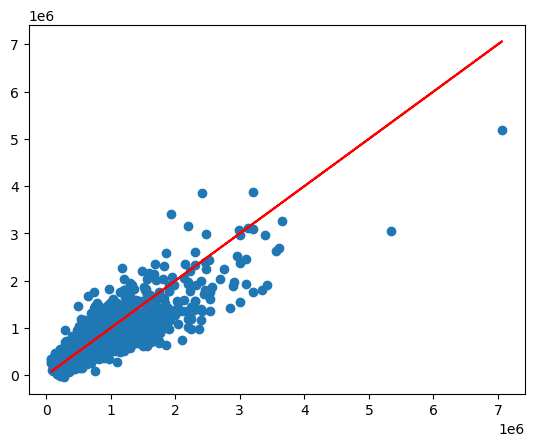

In [19]:
x = df[['bedrooms','bathrooms','sqft_living','floors','waterfront','view',
        'grade','sqft_above','sqft_basement','sqft_living15','lat',]].values
y = df['price'].values
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=50)
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr.fit(x_train_poly,y_train)
pred_poly = lr.predict(x_test_poly)
plt.scatter(y_test,pred_poly)
plt.plot(y_test,y_test,color='red')
plt.show()

In [17]:
print("MSE", mean_squared_error(y_test,pred_poly))
print("R squared", metrics.r2_score(y_test,pred_poly))

MSE 34832574562.12838
R squared 0.7468706100988951
